In [1]:

import torch
from torch import nn
from torch import optim

from torchsummary import summary
import imageVisualizationHelper 
from dilationNeuralNetwork import DilationNeuralNetwork
import commonHelper
import trainLoopHelper
import testLoopHelper
import datasetProvider

In [2]:
DATA_FOLDER = "../../data"
from torch.utils.data import Dataset
image_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = commonHelper.get_device(use_seed=True)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TRAINING data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


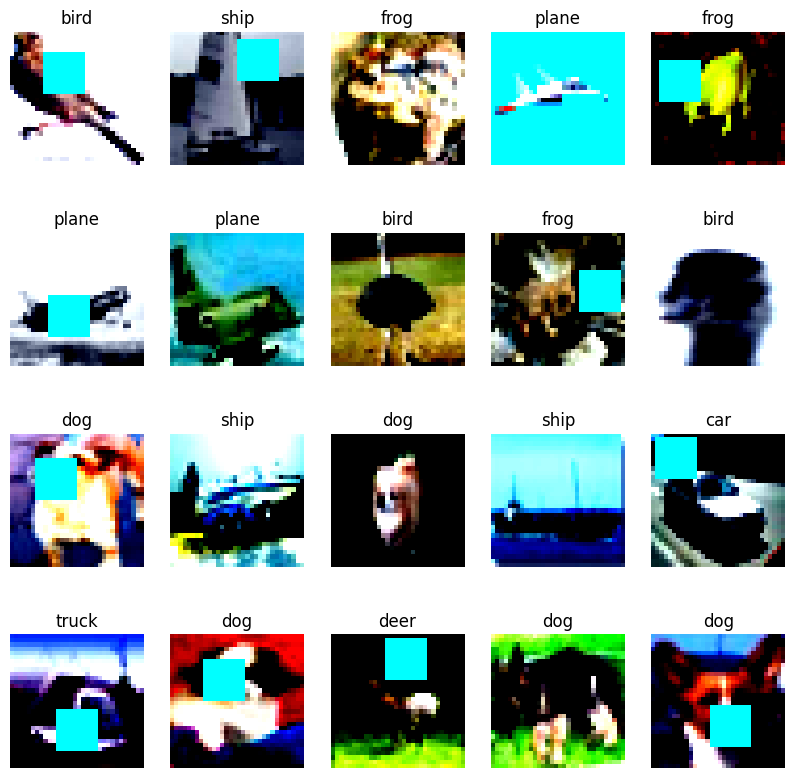

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TEST data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


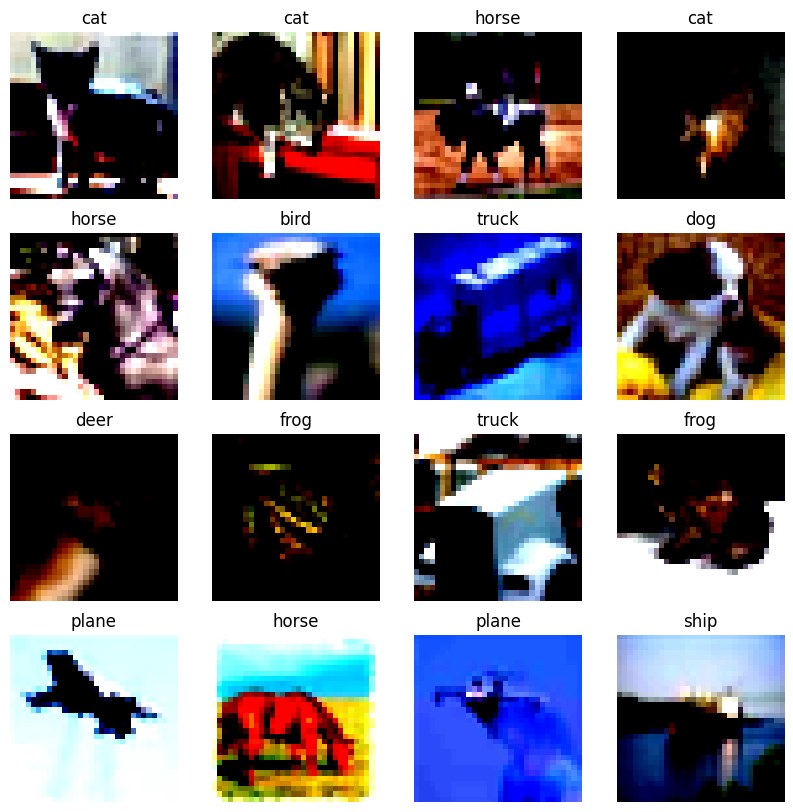

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


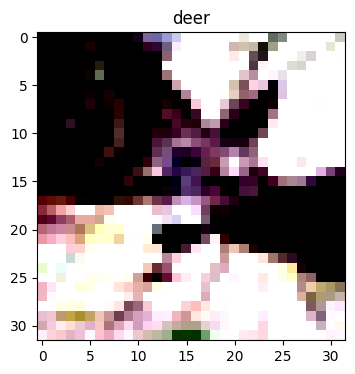

In [3]:

# Download training data from open datasets.

train_transforms_collection = []
train_transforms_collection.append(datasetProvider.create_flip_transformation(is_horizontal=True))
train_transforms_collection.append(datasetProvider.create_shift_scale_rotate_transform(shift_limit=0.1, scale_limit=0.1, rotate_limit=10))
train_transforms_collection.append(datasetProvider.create_random_crop_transformation(max_height=10, max_width=10, fill_value=[0,255,255]))
train_transforms_collection.extend(datasetProvider.create_basic_transforms_collection())

train_transforms = datasetProvider.compose_custom_transforms(train_transforms_collection)
test_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())

train_dataset, test_dataset = datasetProvider.get_CIFAR10_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)

print("---->TRAINING data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=5)


print("---->TEST data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(test_dataset, image_classes, rows=4, cols=4)

# Show single image
sample_idx = torch.randint(0, len(test_dataset), size=(1,))  
image_data, label = test_dataset[sample_idx.item()]
imageVisualizationHelper.show_image(image_data, image_classes[label])


In [4]:

BATCH_SIZE = 128
train_dataloader, test_dataloader = datasetProvider.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)
                                                                    


Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([128, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([128]) torch.int64
Labels for a batch of size 128 are tensor([2, 5, 4, 3, 4, 1, 0, 9, 6, 5, 2, 9, 0, 5, 4, 6, 0, 3, 6, 1, 0, 6, 0, 6,
        3, 1, 4, 9, 3, 3, 5, 0, 4, 3, 7, 9, 0, 7, 5, 2, 1, 2, 9, 2, 7, 2, 1, 3,
        0, 1, 0, 6, 8, 3, 9, 3, 4, 8, 0, 9, 7, 9, 5, 4, 7, 0, 7, 0, 4, 9, 0, 6,
        8, 3, 0, 8, 9, 5, 0, 7, 9, 5, 1, 8, 7, 1, 6, 6, 6, 1, 8, 1, 1, 8, 0, 5,
        3, 8, 9, 5, 3, 7, 3, 8, 0, 4, 8, 2, 6, 3, 0, 1, 6, 1, 5, 3, 4, 9, 6, 1,
        0, 0, 7, 3, 1, 1, 3, 8])


In [13]:
def get_model_instance(index=1, input_size=(3,32,32)) -> nn.Module:
    if(index <= 1 ):
        model = DilationNeuralNetwork(drop_out=0.1).to(device=device)
        summary(model=model, input_size=input_size)
        return model


model = get_model_instance(index=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 28, 28]          36,864
             ReLU-10           [-1, 64, 28, 28]               0
      BatchNorm2d-11           [-1, 64, 28, 28]             128
          Dropout-12           [-1, 64, 28, 28]               0
       BasicBlock-13           [-1, 64, 28, 28]               0
           Conv2d-14           [-1, 32,

In [14]:
def get_correct_prediction_count(predictions : torch.Tensor, valid_labels):
  # torch.argmax locates the indices of the maximum elements within a tensor.
  # It does this along a specified dimension (axis).
  return predictions.argmax(dim=1).eq(valid_labels).sum().item()

In [15]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

MAX_IMAGES_FOR_DISPLAY = 20

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []

correctly_predicted_test_images = []
wrongly_predicted_test_images = []

In [16]:

def train_loop(dataloader, model, loss_fn, optimizer : optim.Optimizer):
    batch_train_accuracy, batch_train_losses, correctly_predicted_images, wrongly_predicted_images = trainLoopHelper.train_loop(dataloader, model, loss_fn, optimizer)
    train_accuracy.append(batch_train_accuracy)
    train_losses.append(batch_train_losses)

    if(len(correctly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        correctly_predicted_trained_images.extend(correctly_predicted_images)

    if(len(wrongly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        wrongly_predicted_trained_images.extend(wrongly_predicted_images)


In [17]:


def test_loop(dataloader, model, loss_fn):

        batch_test_accuracy, batch_test_losses, correctly_predicted_images, wrongly_predicted_images = testLoopHelper.test_loop(dataloader, model, loss_fn)
        test_accuracy.append(batch_test_accuracy)
        test_losses.append(batch_test_losses)

        if(len(correctly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            correctly_predicted_test_images.extend(correctly_predicted_images)

        if(len(wrongly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            wrongly_predicted_test_images.extend(wrongly_predicted_images)


In [18]:
LEARNING_RATE = 0.09
EPOCHS = 30
MOMENTUM = 0.95

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []
correctly_predicted_test_images = []
wrongly_predicted_test_images = []


loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
    scheduler.step()

print("Done!")

Epoch 1


Train: Loss=1.5738 Batch_id=390 Accuracy=32.09: 100%|██████████| 391/391 [00:36<00:00, 10.85it/s]


Test set: Average loss: 131.5529, Accuracy: 4041/10000 (40.41%)

Epoch 2


Train: Loss=1.3926 Batch_id=390 Accuracy=43.22: 100%|██████████| 391/391 [00:36<00:00, 10.66it/s]


Test set: Average loss: 121.9967, Accuracy: 4570/10000 (45.70%)

Epoch 3


Train: Loss=1.2096 Batch_id=390 Accuracy=48.82: 100%|██████████| 391/391 [00:37<00:00, 10.39it/s]


Test set: Average loss: 98.0704, Accuracy: 5402/10000 (54.02%)

Epoch 4


Train: Loss=1.1416 Batch_id=390 Accuracy=52.57: 100%|██████████| 391/391 [00:40<00:00,  9.70it/s]


Test set: Average loss: 91.6839, Accuracy: 5691/10000 (56.91%)

Epoch 5


Train: Loss=1.0786 Batch_id=390 Accuracy=56.03: 100%|██████████| 391/391 [00:37<00:00, 10.37it/s]


Test set: Average loss: 87.1690, Accuracy: 6011/10000 (60.11%)

Epoch 6


Train: Loss=1.1449 Batch_id=390 Accuracy=61.26: 100%|██████████| 391/391 [00:37<00:00, 10.31it/s]


Test set: Average loss: 78.9544, Accuracy: 6474/10000 (64.74%)

Epoch 7


Train: Loss=1.2046 Batch_id=390 Accuracy=63.50: 100%|██████████| 391/391 [00:38<00:00, 10.28it/s]


Test set: Average loss: 73.4463, Accuracy: 6666/10000 (66.66%)

Epoch 8


Train: Loss=1.0810 Batch_id=390 Accuracy=64.28: 100%|██████████| 391/391 [00:37<00:00, 10.32it/s]


Test set: Average loss: 69.7204, Accuracy: 6856/10000 (68.56%)

Epoch 9


Train: Loss=0.8324 Batch_id=390 Accuracy=65.65: 100%|██████████| 391/391 [00:38<00:00, 10.19it/s]


Test set: Average loss: 68.8113, Accuracy: 6877/10000 (68.77%)

Epoch 10


Train: Loss=0.9303 Batch_id=390 Accuracy=66.79: 100%|██████████| 391/391 [00:35<00:00, 10.87it/s]


Test set: Average loss: 64.3627, Accuracy: 7131/10000 (71.31%)

Epoch 11


Train: Loss=0.9538 Batch_id=390 Accuracy=69.32: 100%|██████████| 391/391 [00:35<00:00, 10.91it/s]


Test set: Average loss: 61.3590, Accuracy: 7205/10000 (72.05%)

Epoch 12


Train: Loss=0.8912 Batch_id=390 Accuracy=70.18: 100%|██████████| 391/391 [00:36<00:00, 10.83it/s]


Test set: Average loss: 62.3416, Accuracy: 7200/10000 (72.00%)

Epoch 13


Train: Loss=1.0029 Batch_id=390 Accuracy=70.70: 100%|██████████| 391/391 [00:36<00:00, 10.64it/s]


Test set: Average loss: 61.6710, Accuracy: 7293/10000 (72.93%)

Epoch 14


Train: Loss=1.1242 Batch_id=390 Accuracy=71.20: 100%|██████████| 391/391 [00:35<00:00, 10.96it/s]


Test set: Average loss: 59.1952, Accuracy: 7333/10000 (73.33%)

Epoch 15


Train: Loss=0.5990 Batch_id=390 Accuracy=71.87: 100%|██████████| 391/391 [00:36<00:00, 10.72it/s]


Test set: Average loss: 54.9147, Accuracy: 7550/10000 (75.50%)

Epoch 16


Train: Loss=0.5788 Batch_id=390 Accuracy=73.30: 100%|██████████| 391/391 [00:36<00:00, 10.71it/s]


Test set: Average loss: 52.1351, Accuracy: 7673/10000 (76.73%)

Epoch 17


Train: Loss=0.7489 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:36<00:00, 10.67it/s]


Test set: Average loss: 52.3164, Accuracy: 7687/10000 (76.87%)

Epoch 18


Train: Loss=0.8614 Batch_id=390 Accuracy=74.15: 100%|██████████| 391/391 [00:35<00:00, 10.94it/s]


Test set: Average loss: 51.5438, Accuracy: 7732/10000 (77.32%)

Epoch 19


Train: Loss=0.8963 Batch_id=390 Accuracy=74.46: 100%|██████████| 391/391 [00:36<00:00, 10.78it/s]


Test set: Average loss: 51.6845, Accuracy: 7720/10000 (77.20%)

Epoch 20


Train: Loss=0.5774 Batch_id=390 Accuracy=74.53: 100%|██████████| 391/391 [00:36<00:00, 10.68it/s]


Test set: Average loss: 50.9582, Accuracy: 7744/10000 (77.44%)

Epoch 21


Train: Loss=0.8033 Batch_id=390 Accuracy=75.76: 100%|██████████| 391/391 [00:36<00:00, 10.79it/s]


Test set: Average loss: 49.9634, Accuracy: 7847/10000 (78.47%)

Epoch 22


Train: Loss=0.7702 Batch_id=390 Accuracy=75.75: 100%|██████████| 391/391 [00:36<00:00, 10.72it/s]


Test set: Average loss: 48.2246, Accuracy: 7891/10000 (78.91%)

Epoch 23


Train: Loss=0.5602 Batch_id=390 Accuracy=76.10: 100%|██████████| 391/391 [00:36<00:00, 10.71it/s]


Test set: Average loss: 48.6027, Accuracy: 7898/10000 (78.98%)

Epoch 24


Train: Loss=0.5852 Batch_id=390 Accuracy=76.23: 100%|██████████| 391/391 [00:36<00:00, 10.68it/s]


Test set: Average loss: 48.2739, Accuracy: 7879/10000 (78.79%)

Epoch 25


Train: Loss=0.9130 Batch_id=390 Accuracy=76.49: 100%|██████████| 391/391 [00:36<00:00, 10.69it/s]


Test set: Average loss: 47.5686, Accuracy: 7905/10000 (79.05%)

Epoch 26


Train: Loss=0.6442 Batch_id=390 Accuracy=76.88: 100%|██████████| 391/391 [00:36<00:00, 10.85it/s]


Test set: Average loss: 47.4025, Accuracy: 7909/10000 (79.09%)

Epoch 27


Train: Loss=0.5810 Batch_id=390 Accuracy=76.75: 100%|██████████| 391/391 [00:37<00:00, 10.33it/s]


Test set: Average loss: 47.8776, Accuracy: 7921/10000 (79.21%)

Epoch 28


Train: Loss=0.7538 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:38<00:00, 10.21it/s]


Test set: Average loss: 47.2055, Accuracy: 7948/10000 (79.48%)

Epoch 29


Train: Loss=0.7899 Batch_id=390 Accuracy=77.15: 100%|██████████| 391/391 [00:37<00:00, 10.37it/s]


Test set: Average loss: 47.5861, Accuracy: 7911/10000 (79.11%)

Epoch 30


Train: Loss=0.6735 Batch_id=390 Accuracy=77.32: 100%|██████████| 391/391 [00:37<00:00, 10.32it/s]


Test set: Average loss: 46.9998, Accuracy: 7926/10000 (79.26%)

Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Wrongly predicted test images: 20


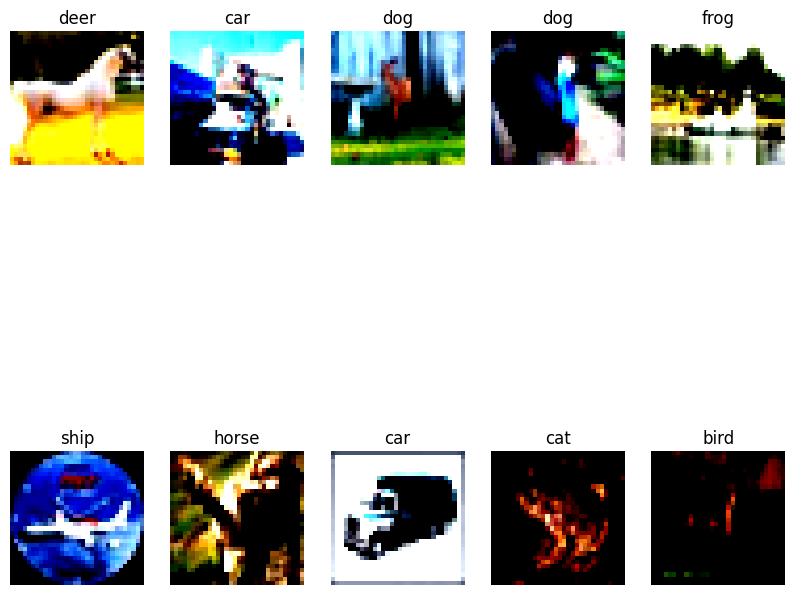

In [19]:

print(f"----****----Wrongly predicted test images: {len(wrongly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_test_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted test images: {len(correctly_predicted_test_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_test_images, image_classes, rows=2, cols=5)


# print(f"----****----Wrongly predicted train images: {len(wrongly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_trained_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted train images: {len(correctly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_trained_images, image_classes, rows=2, cols=5)
